In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar
tqdm.pandas()

sys.path.append('./MolecularClustering')
from molecules_clustering import Butina_clustering, Molecule_clustering
from diversesubset import distance_maxtrix, diverse_subset
from cluster_visualize import cluster_heat_map, cluster_scatter_plot


sys.path.append('./ultility')
from standardize import standardization

reading NP model ...
model in


In [2]:
#load data
df = pd.read_csv("HIV_integrase.csv", index_col=None)
df.head(2)

,ID,Canomical_smiles,Activity
0,CHEMBL19464,O=C(O)C(=O)CC(=O)c1cccc(Cc2ccccc2)c1,8.00
1,CHEMBL193783,CCc1cc(/C=N/CC/N=C/c2cc(CC)sc2S)c(S)s1,5.22


# 1. Standardize

In [3]:
from rdkit.rdBase import BlockLogs
block = BlockLogs()
std = standardization(data=df,ID='ID', smiles_col='Canomical_smiles', active_col='Activity', ro5 =4)
data = std.filter_data()
data.head(2)

  0%|          | 0/2445 [00:00<?, ?it/s]

  0%|          | 0/2377 [00:00<?, ?it/s]

/home/labhhc/Documents/Project/CADD_package/MolecularClustering/./ultility/standardize.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Molecule'] = self.data['Canomicalsmiles'].progress_apply(self.standardize)


,ID,Canomical_smiles,Activity,Canomicalsmiles,Molecule
0,CHEMBL19464,O=C(O)C(=O)CC(=O)c1cccc(Cc2ccccc2)c1,8.00,O=C(O)C(=O)CC(=O)c1cccc(Cc2ccccc2)c1,<rdkit.Chem.rdchem.Mol object at 0x7fc64cf529e0>
1,CHEMBL193783,CCc1cc(/C=N/CC/N=C/c2cc(CC)sc2S)c(S)s1,5.22,CCc1cc(/C=N/CC/N=C/c2cc(CC)sc2S)c(S)s1,<rdkit.Chem.rdchem.Mol object at 0x7fc64cf52a50>


# 2. Clustering

## 2.1. Butina clustering

In [4]:
butina = Butina_clustering(df = data, ID = "ID", smiles_col = "StandSmiles", active_col = 'Activity', 
                             mol_col = 'Molecule', activity_thresh = 7, radius= 2, nBits = 2048, 
                             dis_cutoff = 0.65, cps = 5)
active_set, cluster_centers,  df_active = butina.data_processing()

total # clusters:  38
# clusters with only 1 compound:  13
# clusters with >5 compounds:  16
# clusters with >25 compounds:  4
# clusters with >100 compounds:  1
cluster_centers 16
Silhouette Score: 0.0652540616597683


### 2.1.1. Heatmap - distance matrix

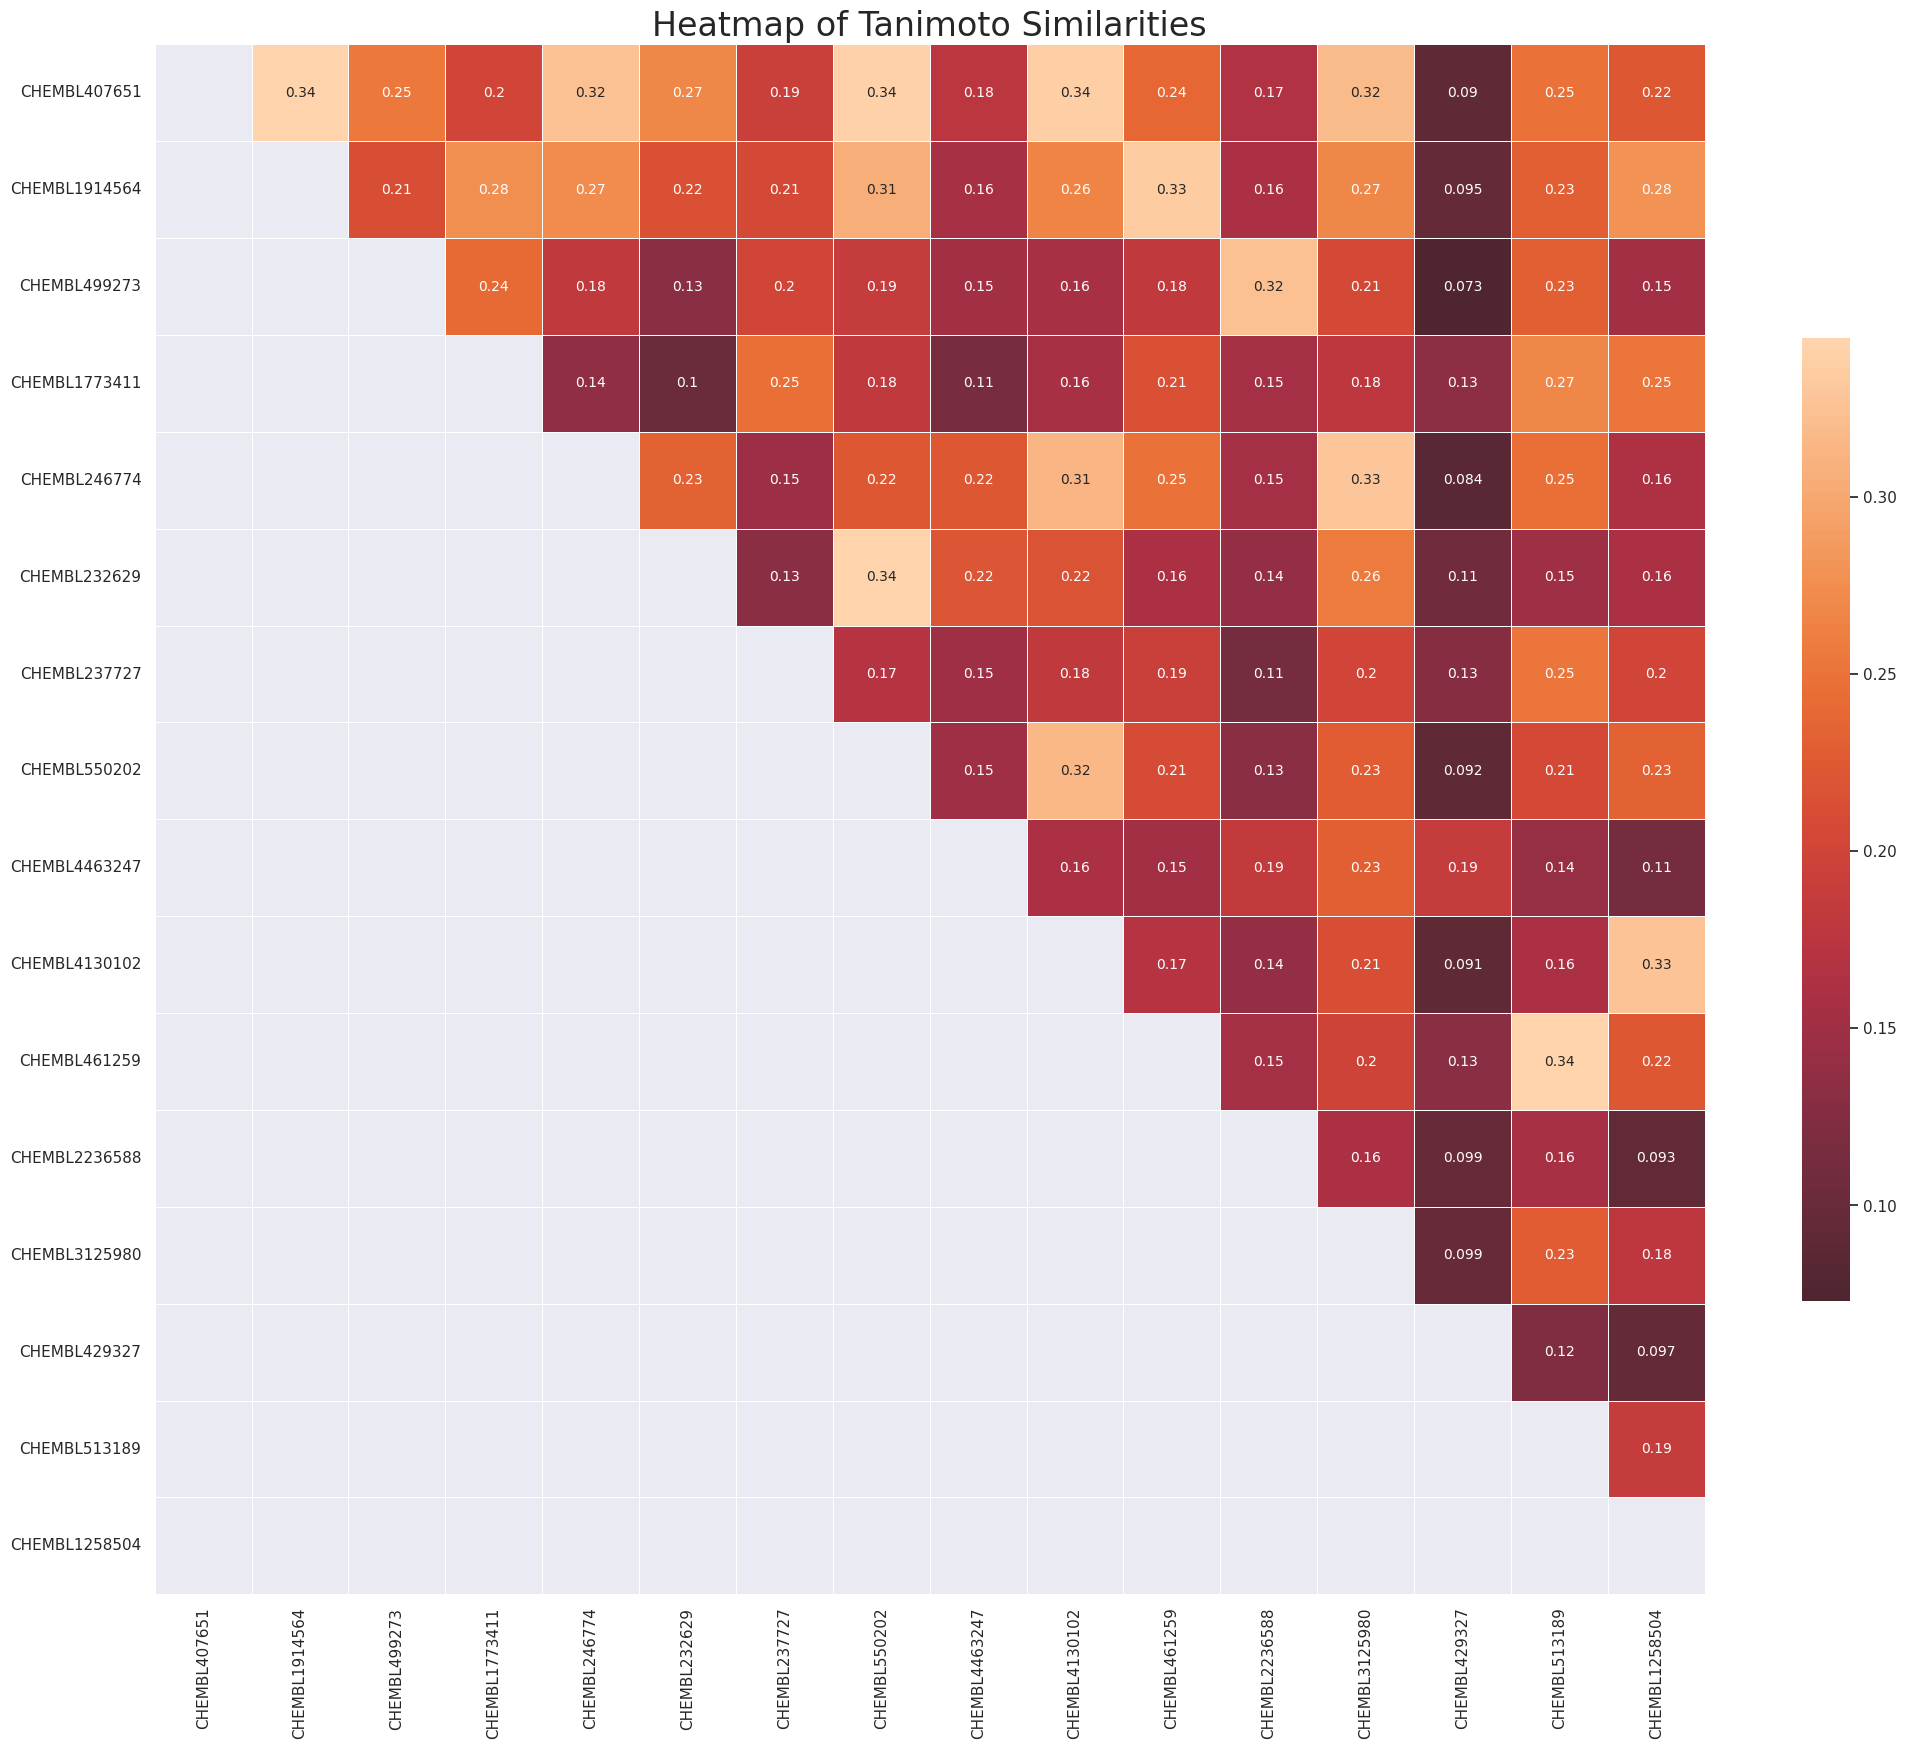

In [9]:
plot = cluster_heat_map(cls_cps = cluster_centers, radius = 2, nBits = 2048)
plot.visualize_triangle()
#plot.visualize_square()
plt.savefig('HeatmapSimilarities.png', dpi = 300)

### 2.1.2. Heatmap - distance matrix

/home/labhhc/Documents/Project/CADD_package/MolecularClustering/./MolecularClustering/cluster_visualize.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls.drop(idx, axis = 0, inplace = True)
/home/labhhc/Documents/Project/CADD_package/MolecularClustering/./MolecularClustering/cluster_visualize.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls["FPs"] = self.df_cls[self.mol_col].apply(self.mol2ecfp)


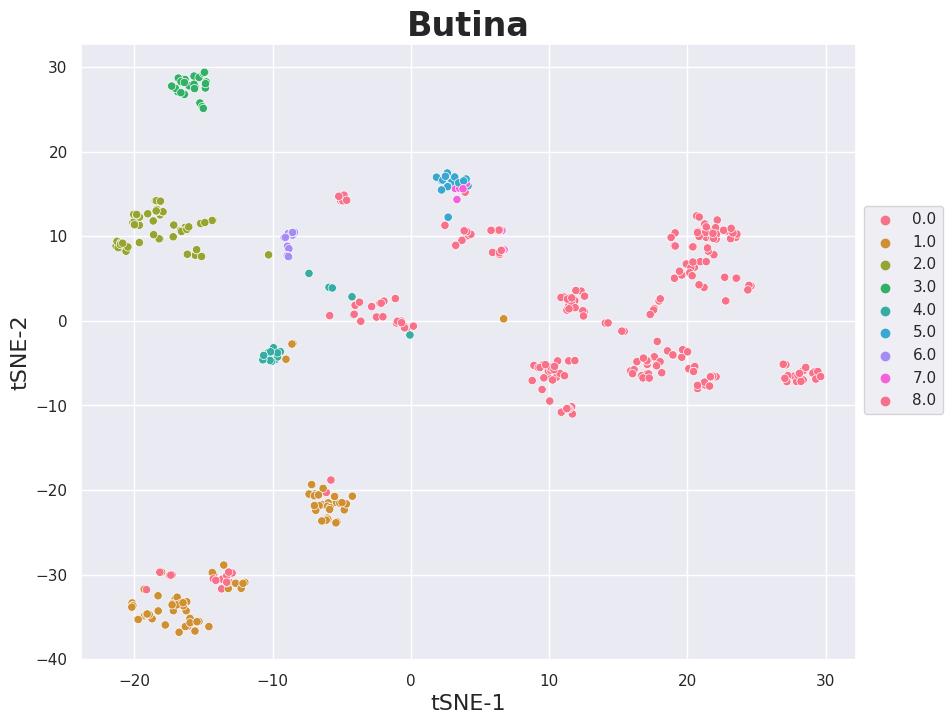

In [8]:
plot2 = cluster_scatter_plot(data=df_active, no_cls= 8, mol_col='Molecule', algo = 'Butina',cluster_col='Cluster',)
plot2.visualize()
plt.savefig('ScatterplotButina.png', dpi = 300)

## 2.2. Kmean

/home/labhhc/Documents/Project/CADD_package/clustering/./MolecularClustering/molecules_clustering.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['fp'] = self.df[self.mol_col].apply(self.mol2ecfp)


  0%|          | 0/20 [00:00<?, ?it/s]

,K,Silhouette Score
0,5,0.145502
1,6,0.127381
2,7,0.152004
3,8,0.149316
4,9,0.141551


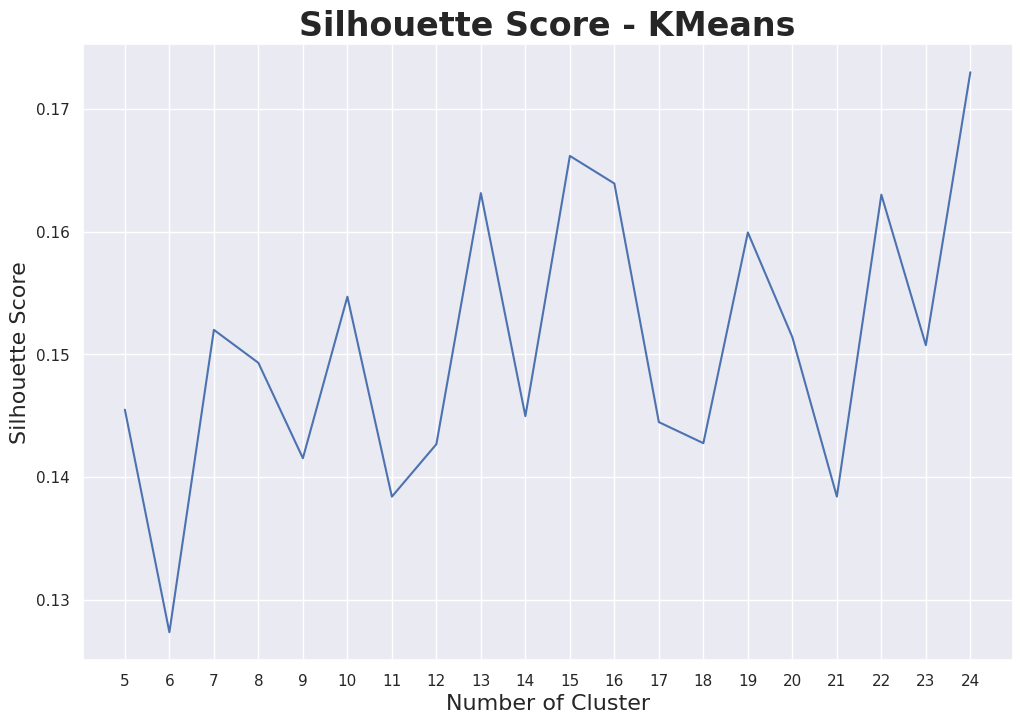

Number of cluser: 13


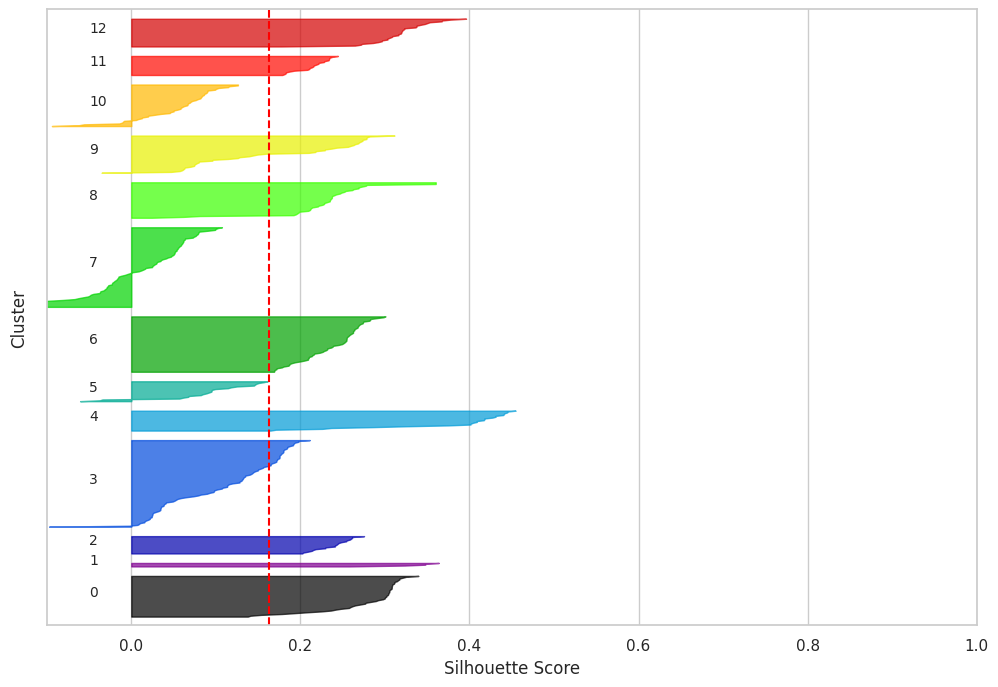

/home/labhhc/Documents/Project/CADD_package/clustering/./MolecularClustering/molecules_clustering.py:301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cls_df.loc[:,'Cluster']=self.clusters_opt


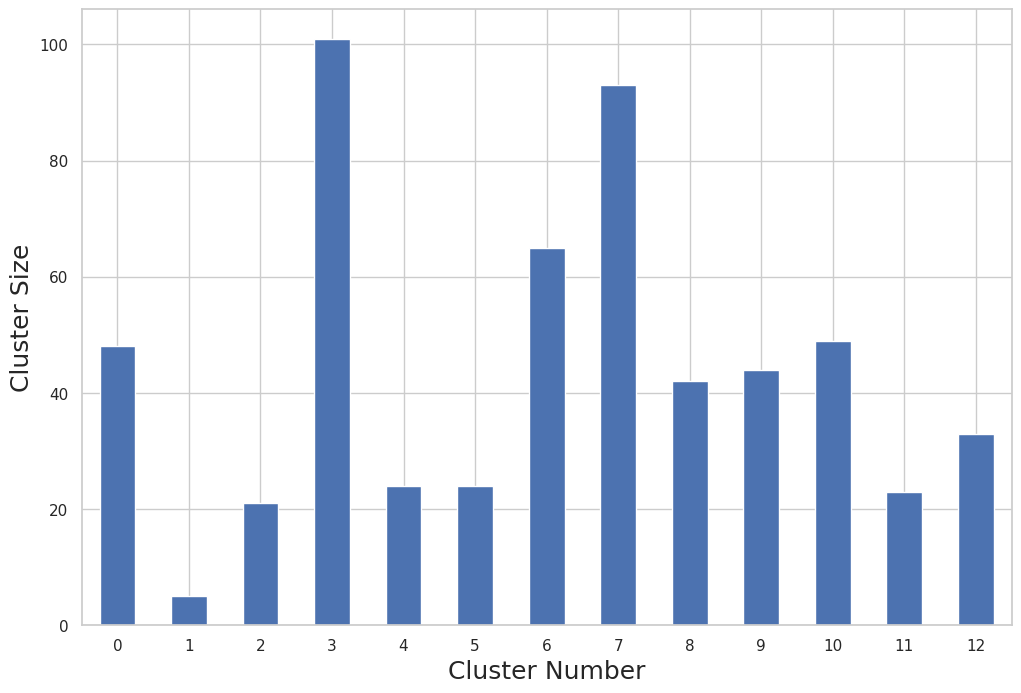

In [7]:
sns.set()
sns.set(rc={'figure.figsize': (12, 8)})
sns.set_style('darkgrid')
cls = Molecule_clustering(data=data,  ID='ID', active_col='Activity', mol_col='Molecule', cluster_range =range(5,25),
                 method ='KMeans', linkage ='complete', thresh =7, radius=2, nBits = 2048)
df_cls = cls.select_k_cluster()

In [8]:
df_cls.head(2)

,ID,fp,Molecule,Cluster
0,CHEMBL19464,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x7f243128aa50>,3
33,CHEMBL242926,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",<rdkit.Chem.rdchem.Mol object at 0x7f2430a3c890>,8


In [9]:
np.unique(df_cls.Cluster)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

# 3. Pickup

In [10]:
import warnings
warnings.filterwarnings("ignore")
dis = distance_maxtrix(data = df_cls[df_cls['Cluster']==2], ID='ID', mol_col='Molecule', dis_func='Tanimoto')
table = dis.calculate_distance_maxtrix()

In [11]:
df_cls.reset_index(drop=True, inplace = True)

In [12]:
pick = diverse_subset(data=df_cls, cluster_col='Cluster', ID='ID', 
                      num_selected=20, mol_col='Molecule', method ='MaxSum')
subset = pick.pick_subset()

  0%|          | 0/13 [00:00<?, ?it/s]

In [13]:
subset.ID

30      CHEMBL538587
43      CHEMBL216874
61     CHEMBL3360122
101    CHEMBL1773312
117    CHEMBL1773317
228    CHEMBL4130252
280    CHEMBL1917876
340     CHEMBL407651
379     CHEMBL562327
442    CHEMBL3309904
489     CHEMBL239413
498     CHEMBL512195
508    CHEMBL3288818
Name: ID, dtype: object